In [1]:
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

**将token与向量相关联**：
1. one-hot encoding
2. word embedding

## 文本预处理：分词器`Tokenizer`(类)

In [2]:
samples = ['The cat sat on the mat.', 'The dog ate my homework']

In [3]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)  # 训练

Using TensorFlow backend.


+ **属性**

In [4]:
# 单词或字符串在训练期间出现的次数
tokenizer.word_counts

OrderedDict([('the', 3),
             ('cat', 1),
             ('sat', 1),
             ('on', 1),
             ('mat', 1),
             ('dog', 1),
             ('ate', 1),
             ('my', 1),
             ('homework', 1)])

In [5]:
# 训练期间，每个单词或字符串在几个文档或文本中出现
tokenizer.word_docs

defaultdict(int,
            {'ate': 1,
             'cat': 1,
             'dog': 1,
             'homework': 1,
             'mat': 1,
             'my': 1,
             'on': 1,
             'sat': 1,
             'the': 2})

In [6]:
# 为每个单词指定一个唯一的索引
tokenizer.word_index

{'ate': 7,
 'cat': 2,
 'dog': 6,
 'homework': 9,
 'mat': 5,
 'my': 8,
 'on': 4,
 'sat': 3,
 'the': 1}

In [7]:
# 训练的文本数量
tokenizer.document_count

2

+ **方法**

In [8]:
# 将字符串转为整数索引组成的列表
sequences = tokenizer.texts_to_sequences(samples)
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [9]:
# one-hot编码
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

也可以有其他向量化模式：

In [10]:
tokenizer.texts_to_matrix(samples, mode='count')  # 计数

array([[0., 2., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [11]:
tokenizer.texts_to_matrix(samples, mode='tfidf')  # tfidf

array([[0.        , 0.86490296, 0.69314718, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.51082562, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [12]:
tokenizer.texts_to_matrix(samples, mode='freq')  # 词频

array([[0.        , 0.33333333, 0.16666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.2       , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## word embedding

one-hot encoding得到的向量是二进制的、稀疏的（绝大部分元素为０）、维度很高的（维度等于词表中的单词个数）；

word embedding得到的是低维的浮点数向量（即密集向量，与稀疏向量相对）。常见的词向量维度是256, 512或1024（处理非常大的词表时）。

word embedding是**从数据中学习得到的**。词向量可以将更多的信息塞入更低的维度中。

获取word embedding的两种方法：
1. 在完成主任务（比如文档分类或情感预测）的同时学习word embedding。一开始是随机的词向量，然后对这些词向量进行学习，其学习方式与学习神经网络的权重相同。
2. 预计算好word embedding，然后将其加载到模型中。这种叫做pretrained word embedding。

### 利用Embedding层学习word embedding

In [13]:
from keras.datasets import imdb
from keras import preprocessing

In [14]:
max_features = 10000   # 作为特征的单词个数

# Load the data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print("shape of x_train (before):", x_train.shape)
print("shape of x_test (before):", x_test.shape)

shape of x_train (before): (25000,)
shape of x_test (before): (25000,)


In [15]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [16]:
maxlen = 20   # 将评论长度限制为只有20个单词

# 将整数列表转换为形状为(samples, maxlen)的二维整数张量
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
print("shape of x_train:", x_train.shape)
print("shape of x_test:", x_test.shape)

shape of x_train: (25000, 20)
shape of x_test: (25000, 20)


In [17]:
x_train

array([[  65,   16,   38, ...,   19,  178,   32],
       [  23,    4, 1690, ...,   16,  145,   95],
       [1352,   13,  191, ...,    7,  129,  113],
       ...,
       [  11, 1818, 7561, ...,    4, 3586,    2],
       [  92,  401,  728, ...,   12,    9,   23],
       [ 764,   40,    4, ...,  204,  131,    9]], dtype=int32)

In [18]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()

# Embeddin层只能作为模型的第一层
# 后面有Flatten层和Dense层的话，必须指定最大输入长度，以便后面将嵌入输入展平
model.add(Embedding(10000, 8, input_length=maxlen))  # output: (samples, maxlen, 8)
model.add(Flatten())  # (samples, maxlen * 8)
model.add(Dense(1, activation='sigmoid'))   # 添加分类器

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 110us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 1s 66us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 1s 66us/step - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/10
20000/20000 [==============================] - 1s 66us/step - loss: 0.4263 - acc: 0.8077 - val_loss: 0.5008 - val_acc: 0.7452
Epoch 5/10
20000/20000 [==============================] - 1s 66us/step - loss: 0.3930 - acc: 0.8258 - val_loss: 0.4981 - val_acc: 0.7538
Epoch 6/10
20000/20000 [==============================] - 1s 66us/step - loss: 0.3668 - acc: 0.8395 - val_loss: 0.5014 - val_acc: 0.7530
Epoch 7/10
20000/20000 [==============================] - 1s 65us/step - loss: 0.3435 - acc: 0.8533 - val_loss: 0.5052 - val_acc

一个sample20个单词（标记），每个单词对应一个向量：

In [20]:
model.get_layer("embedding_1").input

<tf.Tensor 'embedding_1_input:0' shape=(?, 20) dtype=float32>

In [21]:
model.get_layer("embedding_1").output

<tf.Tensor 'embedding_1/embedding_lookup:0' shape=(?, 20, 8) dtype=float32>

### 使用预训练的word embedding

处理IMDB原始数据的标签：

In [22]:
import os

In [23]:
imdb_dir = '/home/bingli/Downloads/aclImdb/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [24]:
texts[:2]

["Having just wasted a couple of hours watching this and for 80% of that time in complete disbelief, I can give this garbage the turkey of the year award, no problem. To say the plot was unbelievable is some big understatement. Frankly I am lost for words to describe this utter tripe. Not only are the characters completely and utterly without any semblance of originality (this sort of stuff has been done much better in dozens of 'serial killer flicks')but the acting was dire. For those who pay to see this, I hope you get your money back, for those who were paid to do this, I hope you GIVE your money back. Believe me folks there are many new releases out there that are much, much better. Go see.",
 "I don't know who wrote the script for this movie, but from the first moment on, I was irritated. Of all possible decisions they could make up in the mountains, why do they make the decision, which is the most dangerous of all? Why do the criminals act dumb, although they managed to get a hug

对IMDB原始数据的文本进行分词：

In [25]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [26]:
maxlen = 100   # 在100个单词后截断评论
training_sampels = 200  # 在200个样本上训练
validation_samples = 10000  # 在10000个样本上验证
max_words = 10000  # 只考虑10000个最常见的单词

# 分词器
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
# 序列的列表，列表中每个序列对应一段输入文本
sequences = tokenizer.texts_to_sequences(texts)

In [27]:
# 为每个单词（标记）指定唯一的索引，索引为0不对应单词
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 88582 unique tokens.


In [28]:
# 每个评论（样本）只取前maxlen(100)个单词
data = pad_sequences(sequences, maxlen=maxlen)

In [29]:
labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [30]:
# 将样本分为训练集和验证集
# 打乱数据集
indices = np.arange(data.shape[0])
np.random.seed(42)
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_sampels]
y_train = labels[:training_sampels]
x_val = data[training_sampels: training_sampels+validation_samples]
y_val = labels[training_sampels: training_sampels+validation_samples]

In [31]:
print("Shape of x_trian:", x_train.shape)
print("Shape of x_val:", x_val.shape)

Shape of x_trian: (200, 100)
Shape of x_val: (10000, 100)


下载Glove词嵌入，并解析Glove词嵌入文件：

In [32]:
glove_dir = '/home/bingli/Downloads/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print("Found %s word vectors:" % len(embeddings_index))

Found 400000 word vectors:


接下来构建一个可以加载到`Embedding`层中的嵌入矩阵。必须是一个形状为(max_words, embedding_dim)的矩阵，对于单词索引（在分词构建的）中索引为i的单词，这个矩阵中的元素i就是这个单词对应的embedding_dim为向量。索引0不应该对应任何单词或标记，只是一个占位符。

准备Glove词嵌入矩阵：

In [33]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [34]:
embedding_matrix.shape

(10000, 100)

定义模型：

In [35]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


+ **在模型中加载GloVe嵌入：**

Embedding层只有一个权重矩阵，是一个二维的浮点数矩阵，其中每个元素i是与索引i相关联的向量。

将准备好的GloVe矩阵加载到Embedding层中，即模型的第一层。

In [36]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

+ **训练模型和评估模型**

In [37]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pretrained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 1.8590 - acc: 0.5450 - val_loss: 0.8459 - val_acc: 0.5038
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7836 - acc: 0.6550 - val_loss: 1.1445 - val_acc: 0.4976
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3852 - acc: 0.8900 - val_loss: 1.3921 - val_acc: 0.5030
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3938 - acc: 0.8450 - val_loss: 0.7118 - val_acc: 0.5603
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1653 - acc: 0.9850 - val_loss: 0.7265 - val_acc: 0.5506
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1150 - acc: 0.9850 - val_loss: 2.5676 - val_acc: 0.5030
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4832 - acc: 0.7950 - val_loss: 0.7411 - val_acc: 0.5733
Epoch 8/10
200/200 [========

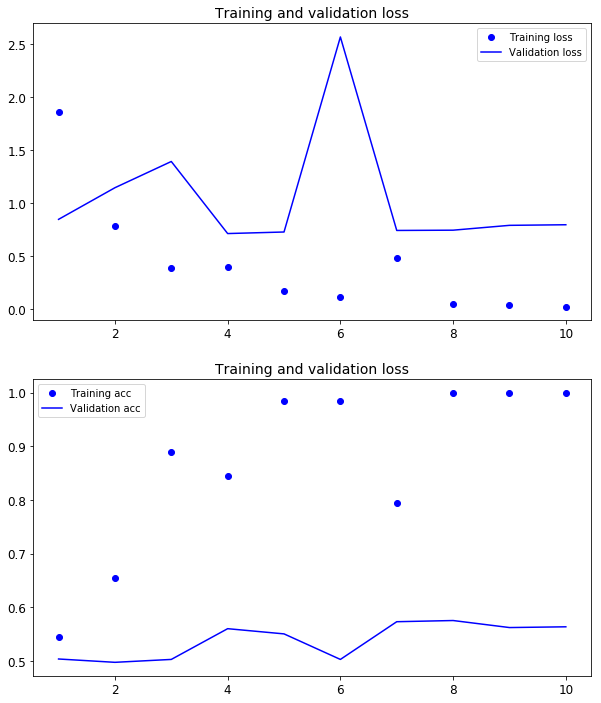

In [38]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, axes = plt.subplots(2, 1, figsize=(10, 12))
axes[0].plot(epochs, loss, 'bo', label='Training loss')
axes[0].plot(epochs, val_loss, 'b', label='Validation loss')
axes[0].set_title("Training and validation loss", fontsize=14)
axes[0].legend()

axes[1].plot(epochs, acc, 'bo', label='Training acc')
axes[1].plot(epochs, val_acc, 'b', label='Validation acc')
axes[1].set_title("Training and validation loss", fontsize=14)
axes[1].legend()

plt.show()

模型很快就开始过拟合。

+ **不加载预训练的词嵌入、也不冻结嵌入层**

这种情况下，将会学到针对任务的输入标记的嵌入。如果有大量的可用数据，这种方法通常比预训练词嵌入更加强大。

In [39]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


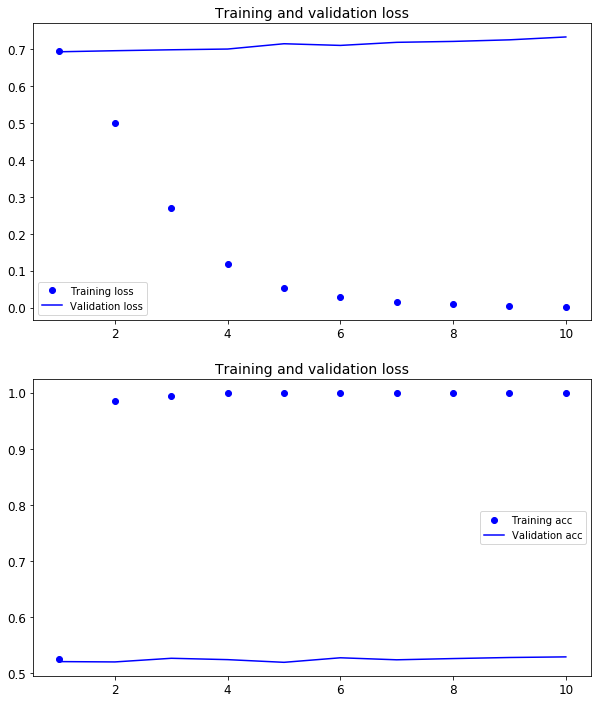

In [40]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, axes = plt.subplots(2, 1, figsize=(10, 12))
axes[0].plot(epochs, loss, 'bo', label='Training loss')
axes[0].plot(epochs, val_loss, 'b', label='Validation loss')
axes[0].set_title("Training and validation loss", fontsize=14)
axes[0].legend()

axes[1].plot(epochs, acc, 'bo', label='Training acc')
axes[1].plot(epochs, val_acc, 'b', label='Validation acc')
axes[1].set_title("Training and validation loss", fontsize=14)
axes[1].legend()

plt.show()

+ **在测试集上评估模型：**

In [41]:
# 对测试集进行分词
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [42]:
x_test

array([[ 142,   30, 2803, ...,    4,    1,  173],
       [ 799,   51, 1082, ...,   82,  904,   25],
       [   0,    0,    0, ...,  138,    3, 2682],
       ...,
       [   1,  275,    8, ...,    1,  144,  151],
       [   0,    0,    0, ...,    2, 3226, 1176],
       [   1, 7110,    4, ...,    5,   27, 1046]], dtype=int32)

In [43]:
x_test.shape

(25000, 100)

In [44]:
# 加载第一个模型
model.load_weights('pretrained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 37us/step


[0.8071237842559814, 0.56168]